In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme(style='darkgrid') # Setting the style of seaborn plots to 'darkgrid'

import plotly.express as px

In [2]:
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv('datasets/Space_Missions_Cleaned.csv')

## Issue : #10
# Company with most active rockets (with percent)

In [4]:
df_rocket = df[['Company Name', 'Status Rocket']]

In [5]:
df_rocket_active = df_rocket[df_rocket['Status Rocket'] == 'StatusActive']
df_rocket_active = df_rocket_active.groupby('Company Name').count()
df_active = df_rocket_active.rename(columns= {'Status Rocket': 'StatusActive'})
df_active.head()

,StatusActive
Company Name,
AEB,3
Arianespace,114
Blue Origin,12
Boeing,1
CASC,211


In [6]:
df_rocket_retired = df_rocket[df_rocket['Status Rocket'] == 'StatusRetired']
df_rocket_retired = df_rocket_retired.groupby('Company Name').count()
df_retired = df_rocket_retired.rename(columns={'Status Rocket': 'StatusRetired'})
df_retired.head()

,StatusRetired
Company Name,
AMBA,8
ASI,9
Arianespace,165
Arm??e de l'Air,4
Boeing,135


In [7]:
df_final = pd.merge(df_active, df_retired, on='Company Name', how='outer')
df_final = df_final.fillna(0)
df_final['StatusActive'] = df_final['StatusActive'].astype('int')
df_final['StatusRetired'] = df_final['StatusRetired'].astype('int')
df_final['Total Rocket'] = df_final['StatusActive'] + df_final['StatusRetired']
df_final['% StatusActive'] = df_final['StatusActive'] / df_final['Total Rocket']
df_final['% StatusRetired'] = df_final['StatusRetired'] / df_final['Total Rocket']
df_final.sort_values(by=['% StatusActive'], inplace=True, ascending=False)
df_final.reset_index(inplace=True)
df_final.head()

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
0,AEB,3,0,3,1.0,0.0
1,Khrunichev,1,0,1,1.0,0.0
2,Blue Origin,12,0,12,1.0,0.0
3,i-Space,1,0,1,1.0,0.0
4,Sea Launch,36,0,36,1.0,0.0


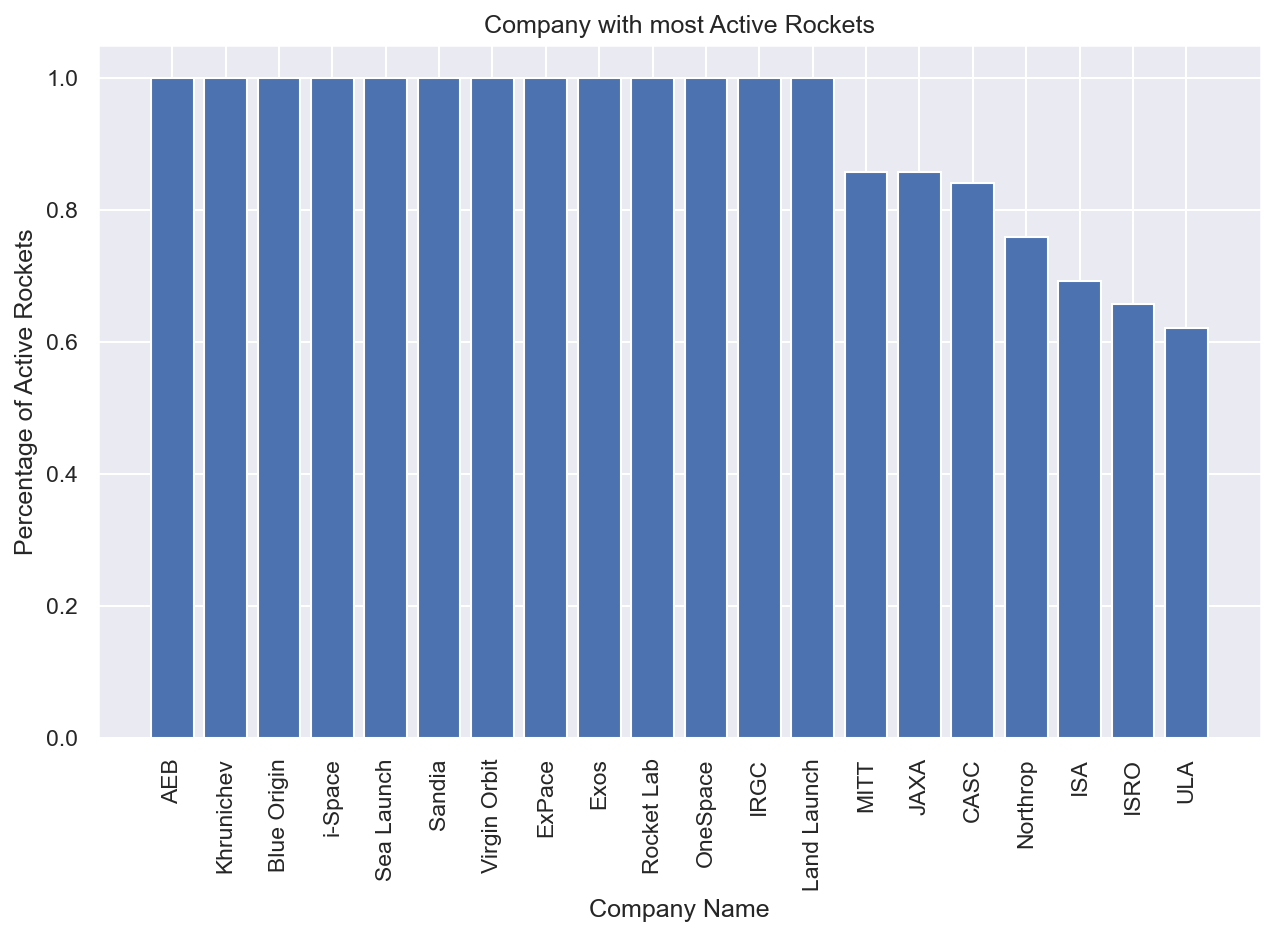

In [8]:
df_final_active_plot = df_final.head(20)

x = df_final_active_plot['Company Name']
y = df_final_active_plot['% StatusActive']

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Percentage of Active Rockets')
plt.title('Company with most Active Rockets')
plt.xticks(rotation=90)
plt.show()

## Issue : #11
# Company with most retired rockets (with percent)

In [9]:
df_final.sort_values(by=['% StatusRetired'], inplace=True, ascending=False)
#df_final.reset_index(inplace=True)
df_final.head()

,Company Name,StatusActive,StatusRetired,Total Rocket,% StatusActive,% StatusRetired
55,Yuzhmash,0,2,2,0.0,1.0
42,Lockheed,0,79,79,0.0,1.0
31,Landspace,0,1,1,0.0,1.0
32,UT,0,5,5,0.0,1.0
33,US Navy,0,17,17,0.0,1.0


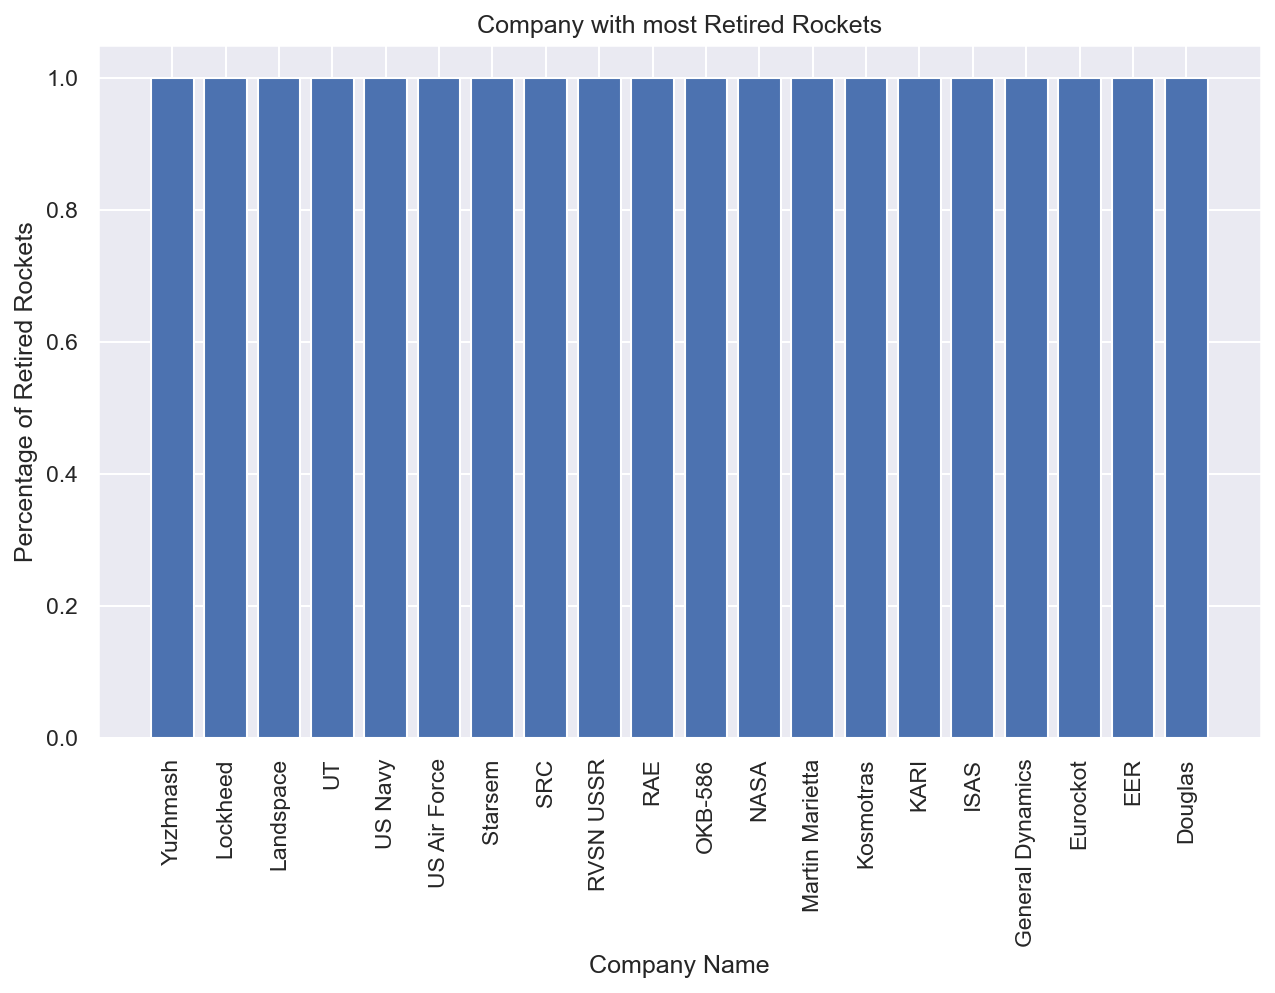

In [10]:
df_final_retired_plot = df_final.head(20)

x = df_final_retired_plot['Company Name']
y = df_final_retired_plot['% StatusRetired']

figure(figsize=(10, 6), dpi=150)
plt.bar(x, y)
plt.xlabel('Company Name')
plt.ylabel('Percentage of Retired Rockets')
plt.title('Company with most Retired Rockets')
plt.xticks(rotation=90)
plt.show()

## Issue: #8
# Visualisation of Launches by hour of Companies

In [11]:
df_rocket = df[['Company Name', 'DateTime']]
df_rocket['DateTime'] = pd.to_datetime(df_rocket['DateTime'])
df_rocket['hour'] = df_rocket['DateTime'].apply(lambda datetime: datetime.hour)
df_rocket['day'] = df_rocket['DateTime'].apply(lambda datetime: datetime.day)
df_rocket = df_rocket.drop('DateTime', axis=1)
df_rocket.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_17284\753044038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocket['DateTime'] = pd.to_datetime(df_rocket['DateTime'])
C:\Users\hp\AppData\Local\Temp\ipykernel_17284\753044038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rocket['hour'] = df_rocket['DateTime'].apply(lambda datetime: datetime.hour)
C:\Users\hp\AppData\Local\Temp\ipykernel_17284\753044038.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Company Name,hour,day
0,SpaceX,5.0,7.0
1,CASC,4.0,6.0
2,SpaceX,23.0,4.0
3,Roscosmos,21.0,30.0
4,ULA,11.0,30.0


C:\Users\hp\AppData\Local\Temp\ipykernel_17284\1746280625.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rocket['hour'],kde=True,rug=True,bins=80)


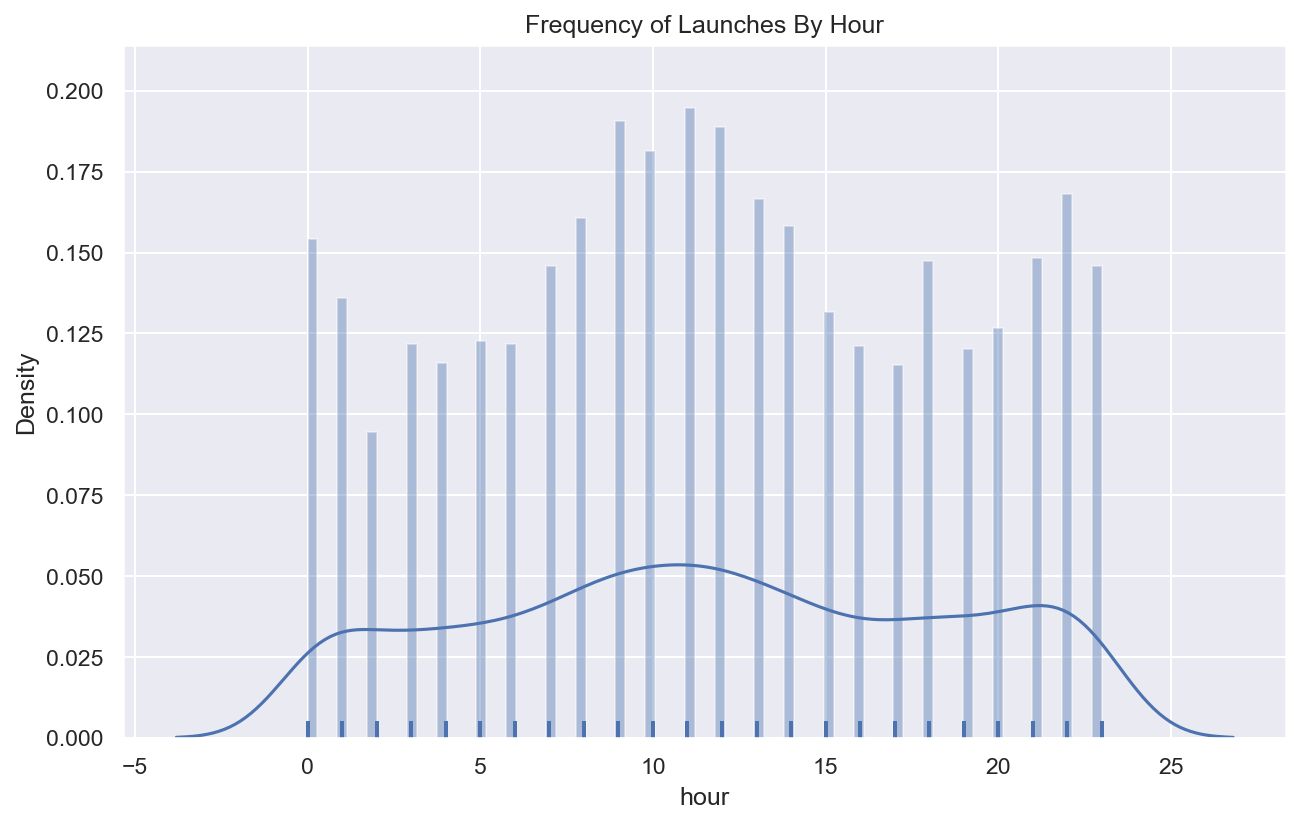

In [12]:
plt.figure(figsize=(10,6),dpi=150)
sns.distplot(df_rocket['hour'],kde=True,rug=True,bins=80)
plt.title("Frequency of Launches By Hour")
plt.show()

## Issue: #7
# Visualisation of Launches by Day of Companies

C:\Users\hp\AppData\Local\Temp\ipykernel_17284\3917088702.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_rocket['day'],kde=True,rug=True,bins=80)


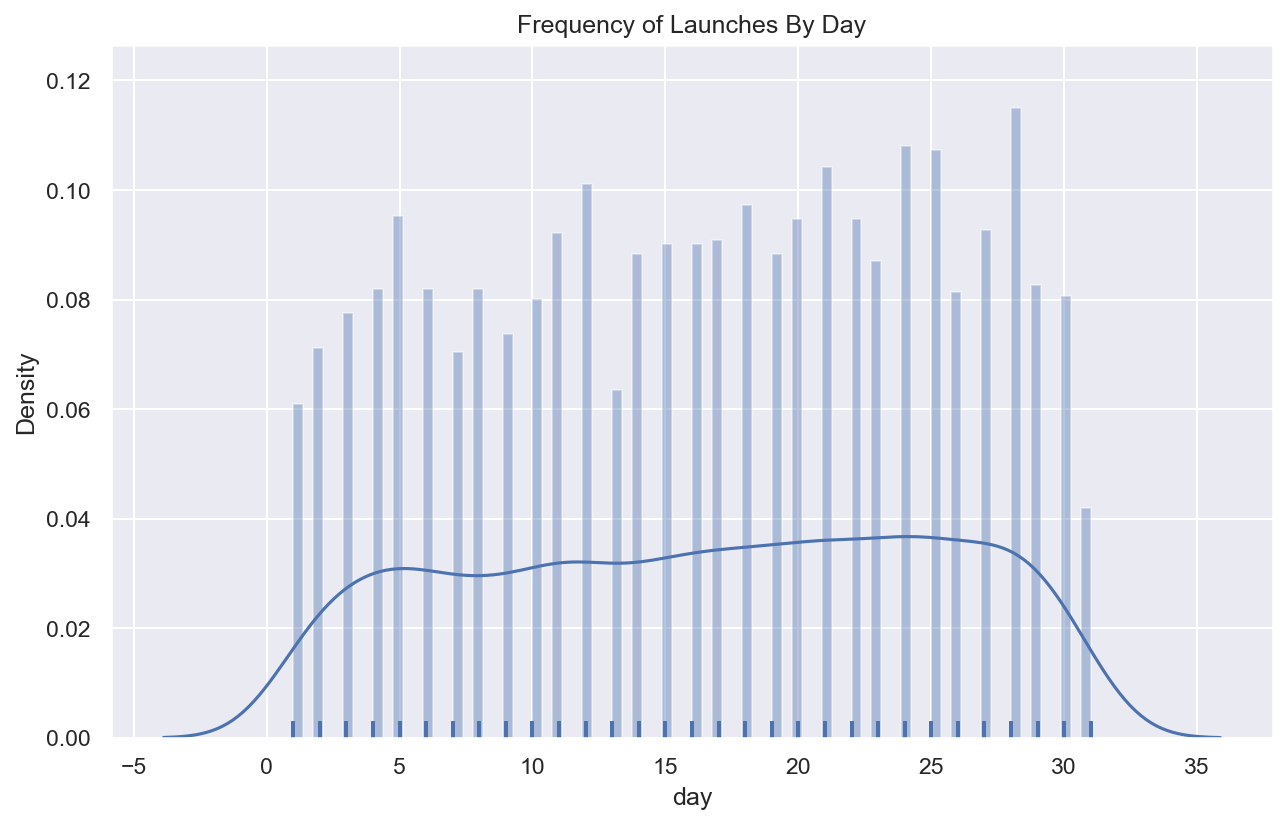

In [13]:
plt.figure(figsize=(10,6),dpi=150)
sns.distplot(df_rocket['day'],kde=True,rug=True,bins=80)
plt.title("Frequency of Launches By Day")
plt.show()

## Issue #3
# Visualisation of Year-wise failed missions of Companies

In [14]:
df_rocket = df[['Year', 'Status Mission']]
df_rocket_failure = df_rocket[df_rocket['Status Mission'] == 'Failure']
df_rocket_failure = df_rocket_failure.groupby('Year').count()

df_rocket_failure = df_rocket_failure.rename(columns={'Status Mission':'Failed Missions'})
df_rocket_failure.reset_index(inplace=True)
df_rocket_failure.head()

,Year,Failed Missions
0,1957.0,1
1,1958.0,14
2,1959.0,9
3,1960.0,19
4,1961.0,17


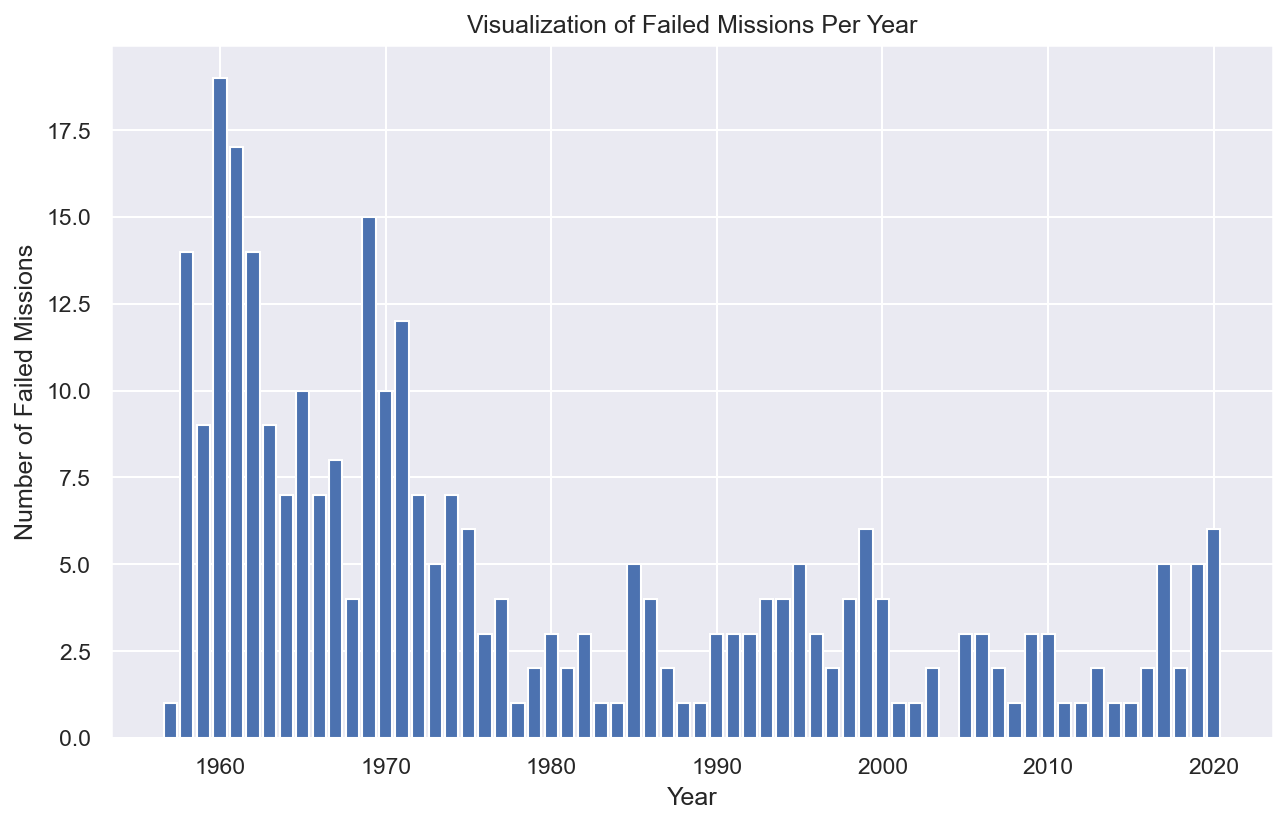

In [15]:
figure(figsize=(10, 6), dpi=150)
plt.bar(df_rocket_failure['Year'], df_rocket_failure['Failed Missions'])
plt.xlabel('Year')
plt.ylabel('Number of Failed Missions')
plt.title('Visualization of Failed Missions Per Year')
plt.show()